(-0.5, 299.5, 299.5, -0.5)

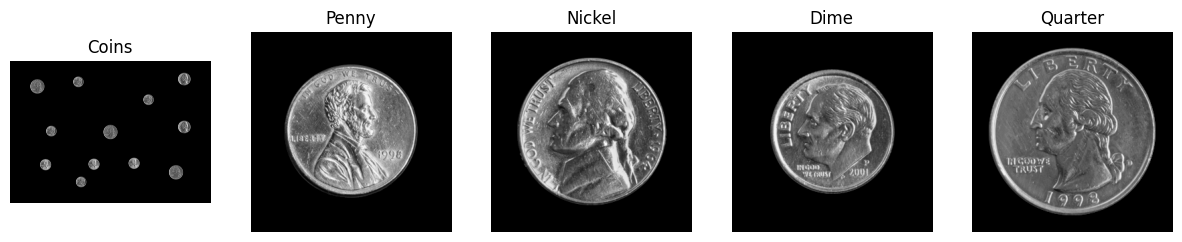

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

coins = cv.imread('coins/coins.png', cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread('coins/Penny.png', cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread('coins/Nickel.png', cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread('coins/Dime.png', cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread('coins/Quarter.png', cv.IMREAD_GRAYSCALE)
assert q is not None

# Display the images
plt.figure(figsize=(15, 10))
plt.subplot(1, 5, 1)
plt.imshow(coins, cmap='gray')
plt.title('Coins')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(p, cmap='gray')
plt.title('Penny')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(n, cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(d, cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(q, cmap='gray')
plt.title('Quarter')
plt.axis('off')


(-0.5, 3208.5, 2180.5, -0.5)

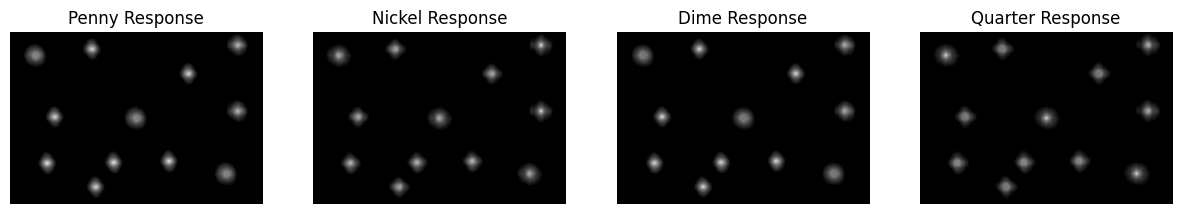

In [2]:
# Get the template matching results

p_resp = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED) # Using the normalized cross-correlation
n_resp = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.imshow(p_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Penny Response')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(n_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Nickel Response')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(d_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Dime Response')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(q_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Quarter Response')
plt.axis('off')


In [3]:
# Vertically stack the responses along a new axis
resp_stack = np.stack([p_resp, n_resp, d_resp, q_resp], axis=2)

In [4]:
resp_stack.shape

(2181, 3209, 4)

In [28]:
from skimage.feature import peak_local_max

pastel_colors = [
    (255, 182, 193), # Light Pink
    (173, 216, 230), # Light Blue
    (119, 221, 119), # Light Green
    (253, 253, 150)  # Light Yellow
]

# Make a color image to draw on
coins_color = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)

# Find the local peaks
coordinates = peak_local_max(resp_stack, exclude_border=0, min_distance=5, threshold_abs=0.8)
print(coordinates)

[[ 166 2892    1]
 [1002 2892    1]
 [1074  572    2]
 [1638 2016    0]
 [1962 1092    2]
 [1654 1316    0]
 [1662  472    0]
 [ 214 1044    2]
 [ 294  328    3]
 [ 526 2268    2]
 [1090 1604    3]
 [1794 2748    3]]


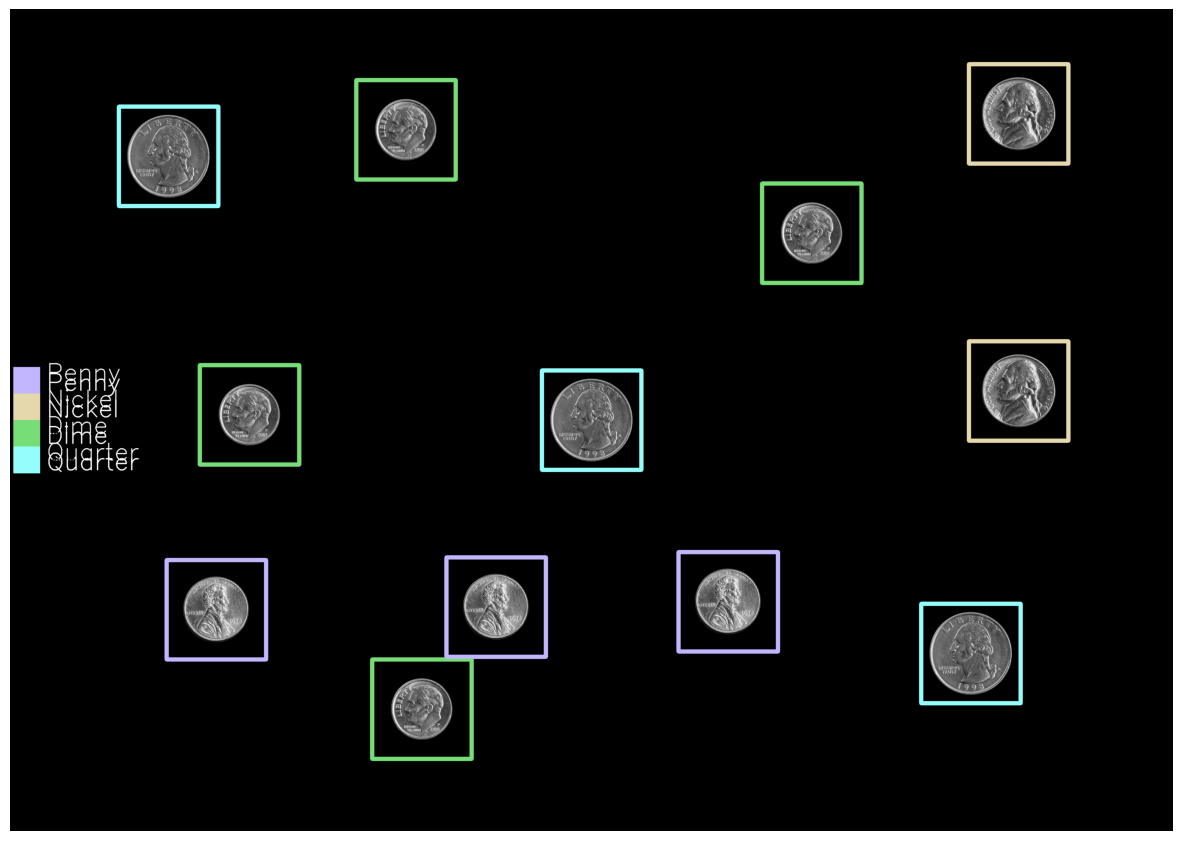

In [39]:
# Function to draw the legend on the image
def draw_legend(image, template_names, colors, scale=0.8, rect_size=100):
    
    legend_height = int(len(template_names) * rect_size * scale)  # Total height of the legend
    start_y = (image.shape[0] - legend_height) // 2  # Starting y-coordinate to center the legend

    for i, (name, color) in enumerate(zip(template_names, colors)):
        scaled_font_scale = scale * 3  # font scale based on legend scale
        
        # Calculate rectangle coordinates
        rect_top_left = (10, start_y + int(rect_size * scale * i))
        rect_bottom_right = (10 + int(rect_size * scale), start_y + int(rect_size * scale + rect_size * scale * i))
        
        # Draw rectangle
        cv.rectangle(image, rect_top_left, rect_bottom_right, color=color, thickness=-1)
        
        # Calculate text position
        text_x = 30 + int(rect_size * scale)
        text_y = start_y + int(rect_size * scale + 0.5 * rect_size * scale * (2 * i + 1)) - int(rect_size / 2)
        
        # Draw text
        cv.putText(image, name, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=scaled_font_scale, color=(255, 255, 255), thickness=2, lineType=cv.LINE_AA)

template_names = ["Penny", "Nickel", "Dime", "Quarter"]

# Draw the legend on the image
draw_legend(coins, template_names, pastel_colors)

# Display the image with the legend
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(coins_color, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [43]:
# Initialize a dictionary to store the counts
counts = {0: 0, 1: 0, 2: 0, 3: 0}

# Iterate through the array and count occurrences of each value in the last column
for row in coordinates:
    value = row[2]
    if value in counts:
        counts[value] += 1

# Print the counts
print("Occurrences of each value:")
for key, count in counts.items():
    print(f"{template_names[key]}: {count}")

Occurrences of each value:
Penny: 3
Nickel: 2
Dime: 4
Quarter: 3


In [45]:
amount = 0.01 * counts[0] + 0.05 * counts[1] + 0.1 * counts[2] + 0.25 * counts[3]
print(f"Total amount: ${amount:.2f}")

Total amount: $1.28


### Assumptions I made

- There are no over lapping coins.
- There is no noise in the background.
- The selected template matching method is the most suitable one.
- There are only given 4 types of coins. 
- Selected threshold is sufficient.